# WeatherPy

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
for idx, city in enumerate(cities):
    print(f"Processing Record {idx + 1} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 | amderma
City not found. Skipping...
Processing Record 2 | isangel
Processing Record 3 | chuy
Processing Record 4 | manacapuru
Processing Record 5 | miramar
Processing Record 6 | bethel
Processing Record 7 | aflu
City not found. Skipping...
Processing Record 8 | rikitea
Processing Record 9 | namatanai
Processing Record 10 | bonavista
Processing Record 11 | gemena
Processing Record 12 | alice springs
Processing Record 13 | tumannyy
City not found. Skipping...
Processing Record 14 | bafq
Processing Record 15 | baruun-urt
Processing Record 16 | hilo
Processing Record 17 | mataura
Processing Record 18 | jamestown
Processing Record 19 | nome
Processing Record 20 | kodiak
Processing Record 21 | ushuaia
Processing Record 22 | murgab
Processing Record 23 | nanortalik
Processing Record 24 | camrose
Processing Record 25 | blechepsin
Processing Record 26 | birao
Processing Record 27 | sarkand
Processing Rec

Processing Record 234 | yabelo
Processing Record 235 | clyde river
Processing Record 236 | zhigansk
Processing Record 237 | lompoc
Processing Record 238 | tuktoyaktuk
Processing Record 239 | cockburn town
Processing Record 240 | mar del plata
Processing Record 241 | benito juarez
Processing Record 242 | nemuro
Processing Record 243 | gornopravdinsk
Processing Record 244 | mount gambier
Processing Record 245 | sol-iletsk
Processing Record 246 | chernyshevskiy
Processing Record 247 | filingue
Processing Record 248 | vila franca do campo
Processing Record 249 | casas grandes
Processing Record 250 | malpe
Processing Record 251 | lavrentiya
Processing Record 252 | guarapari
Processing Record 253 | grants pass
Processing Record 254 | hasaki
Processing Record 255 | pavlovsk
Processing Record 256 | norman wells
Processing Record 257 | airai
Processing Record 258 | tuatapere
Processing Record 259 | hithadhoo
Processing Record 260 | high prairie
Processing Record 261 | innisfail
Processing Recor

Processing Record 464 | port lincoln
Processing Record 465 | kuandian
Processing Record 466 | kismayo
Processing Record 467 | juifang
City not found. Skipping...
Processing Record 468 | bandar-e anzali
Processing Record 469 | madang
Processing Record 470 | ixtapa
Processing Record 471 | petropavlovsk-kamchatskiy
Processing Record 472 | te anau
Processing Record 473 | miri
Processing Record 474 | sahrak
City not found. Skipping...
Processing Record 475 | keffi
Processing Record 476 | aldan
Processing Record 477 | puerto escondido
Processing Record 478 | neuquen
Processing Record 479 | emerald
Processing Record 480 | le port
Processing Record 481 | vangaindrano
Processing Record 482 | presidencia roque saenz pena
Processing Record 483 | port hedland
Processing Record 484 | katsuura
Processing Record 485 | gorno-chuyskiy
City not found. Skipping...
Processing Record 486 | lat yao
Processing Record 487 | shumskiy
Processing Record 488 | kuito
Processing Record 489 | hoquiam
Processing Reco

In [8]:
len(lat)
len(temp)

620

## Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Latitude      567
Longitude     567
Max Temp      567
Wind Speed    567
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,isangel,7.0,VU,1.579961e+09,82.0,-19.55,169.27,77.47,13.85
1,chuy,69.0,UY,1.579961e+09,34.0,-33.70,-53.46,88.29,12.06
2,manacapuru,100.0,BR,1.579961e+09,93.0,-3.30,-60.62,79.99,1.59
3,miramar,40.0,US,1.579961e+09,93.0,25.99,-80.23,70.00,3.36
4,bethel,100.0,US,1.579961e+09,90.0,41.37,-73.41,42.01,4.00


## Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

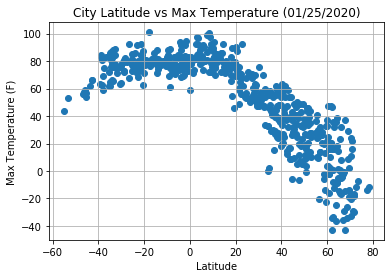

In [10]:
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's maximum temperature is related to its latitude. Specifically, it shows how max temperature changes as you get closer (or farther) away from the equator (Latitude of 0). For example, the cities with the highest maximum temperatures are closest to the equator (that is, cities from about -40 to 20 degrees Latitude). As you go farther south into the southern hemisphere, the max temperature starts to decrease. And, as you go farther north in the northern hemisphere, the max temperature steadily decreases as well. So, from this graph, we can conclude that the hottest temperatures for a city are higher for a city that is closer to the equator and lower for a city farther north or south.

### Latitude vs Humidity Plot

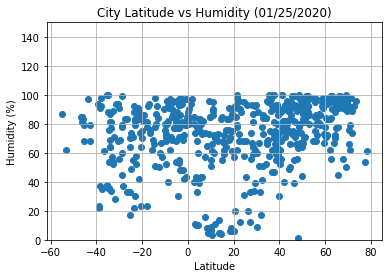

In [24]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (01/25/2020)')
plt.ylim(0, 150)
plt.grid()
plt.savefig("./Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's humidity is related to its latitude. Specifically, it shows how humidity changes as you get closer (or farther) away from the equator (Latitude of 0). Looking at this graph, the data points are scattered pretty evenly throughout, and it does not appear that there is a strong correlation between a city's latitude and humidity. Most cities (near the equator or farther away) that are shown in this graph have a humidity from about 60% to 100%. So, high humidity occurs in cities irregardless of latitude. However, there are a few cities that have low humidity, and according this graph, these cities are found only near the equaor. Besides a few outliers, there are not really any cities farther away from the equator that have low humidity.

### Latitude vs Cloudiness Plot

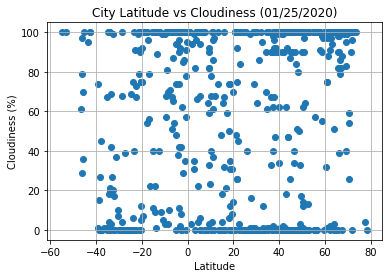

In [12]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's cloudiness is related to its latitude. Specifically, it shows how cloudiness changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are pretty spread out evenly on the graph. Most cities (near or far from the equator) either generally have a really low cloudiness level (near 0) or a really high cloudiness level (near 100). So, most of the data points are near the extremes. However, there are cities that have a cloudiness level somewhere in between. Because the data points are scattered, it does not appear that there is a strong correlation between a city's latitude and cloudiness. That is, from the OpenWeatherMap API, we were able to find cites near the equator that had a low cloudiness level, a high cloudiness level, or a cloudiness level somewhere in between. The same goes for cities farther away from the equator.

### Latitude vs Wind Speed Plot

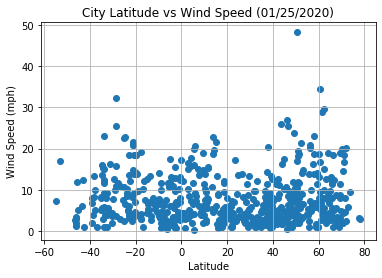

In [13]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (01/25/2020)')
plt.grid()
plt.savefig("./Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's wind speed is related to its latitude. Specifically, it shows how wind speed changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are clustered around lower wind speed values. Both cities near the equator and farther away from the equator appear to have lower wind speeds. So, from the above graph, it does not appear that there is a strong correlation between a city's latitude and wind speed. Also, I think it is important to point out that there are some cities farther away from the equator in the southern hemisphere (-20 to -40 Latitude) and in the northern hemisphere (40 to 60 Latitude) that have higher wind speeds.

## Linear Regression

In [14]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

    

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7776181567410053


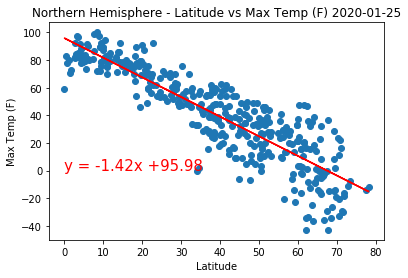

In [16]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25459290147880165


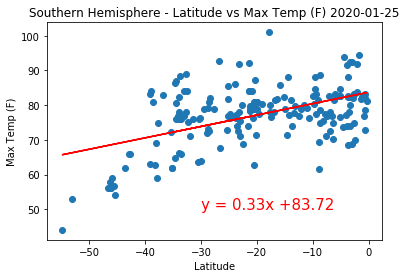

In [17]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18717119035630386


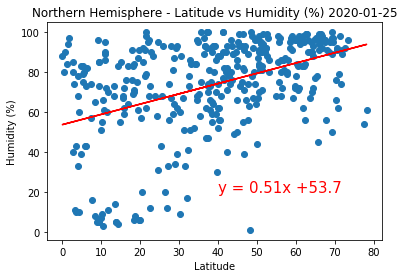

In [18]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18717119035630386


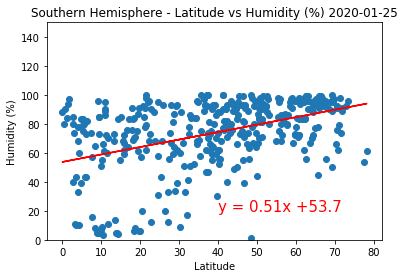

In [19]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047220694368715975


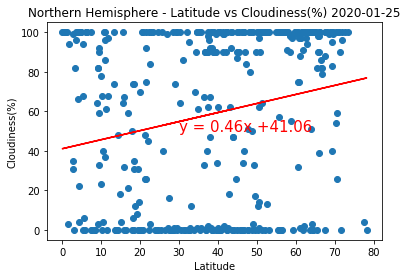

In [20]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06353394186258596


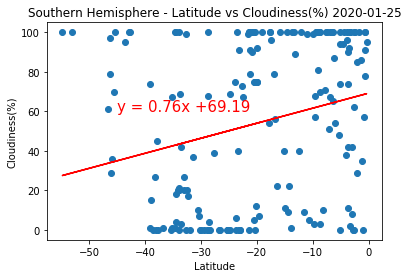

In [21]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005314443513934636


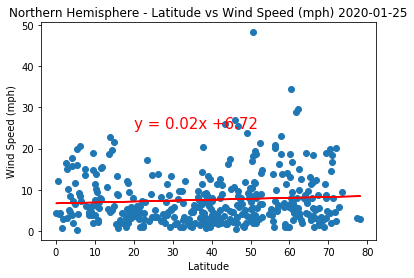

In [22]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01890136676069522


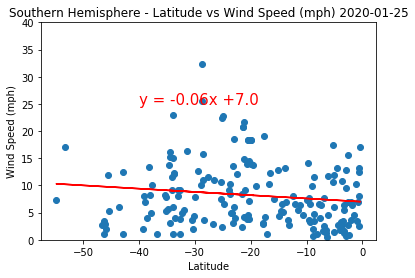

In [23]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)